In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
results_global_neighbor = pd.read_csv("./data/extrapolation_global_neighbor.csv")
results_itself = pd.read_csv("./data/extrapolation_itself.csv").replace({"itself_subsamples":"inter_itself_subsamples"})
results_interpolation = pd.read_csv("./data/interpolation_global.csv")
results_interpolation["model"]="inter_global"
col = ["city","model","surf","loc","rmse","r2","mae"]

In [3]:
df = pd.concat([results_global_neighbor[col], results_itself[col], results_interpolation[col]]).reset_index(drop=True)

In [4]:
df["model_name"] = df["model"]+"_S"+df["surf"]+"_L"+df["loc"]

In [5]:
df = df.query("model!='neighbor'")
df

,city,model,surf,loc,rmse,r2,mae,model_name
0,1,global,N,N,1.862094,0.956263,1.416402,global_SN_LN
1,1,global,N,Y,1.147401,0.983389,0.880859,global_SN_LY
2,1,global,Y,N,1.513453,0.971107,1.165350,global_SY_LN
3,1,global,Y,Y,1.288796,0.979047,0.984194,global_SY_LY
5,1,neighbor_subsamples,N,N,1.295319,0.978833,1.004840,neighbor_subsamples_SN_LN
6,2,global,N,N,1.898275,0.965967,1.476223,global_SN_LN
7,2,global,N,Y,1.311648,0.983753,0.998412,global_SN_LY
8,2,global,Y,N,1.331539,0.983256,1.000515,global_SY_LN
9,2,global,Y,Y,1.339894,0.983046,1.026100,global_SY_LY
11,2,neighbor_subsamples,N,N,1.771659,0.970359,1.390122,neighbor_subsamples_SN_LN


S: surface data  
L: latitude + longitude   
N: no  
Y: yes  
inter: interpolation, including the location for testing  
subsample: use the data from the “sampled training data”, about ~3000 samples for a single city  
global: use all the “sampled training data”

In [6]:
known_gridcell = {
    "1": {"lat":32.51309, "lon":253.75},
    "2": {"lat":40.994766, "lon":277.5},
    "3": {"lat":40.994766, "lon":247.5}
}

pred_gridcell = {
    "1": {"lat":31.57068, "lon":253.75},
    "2": {"lat":41.937172, "lon":277.5},
    "3": {"lat":42.87958, "lon":247.5}
}

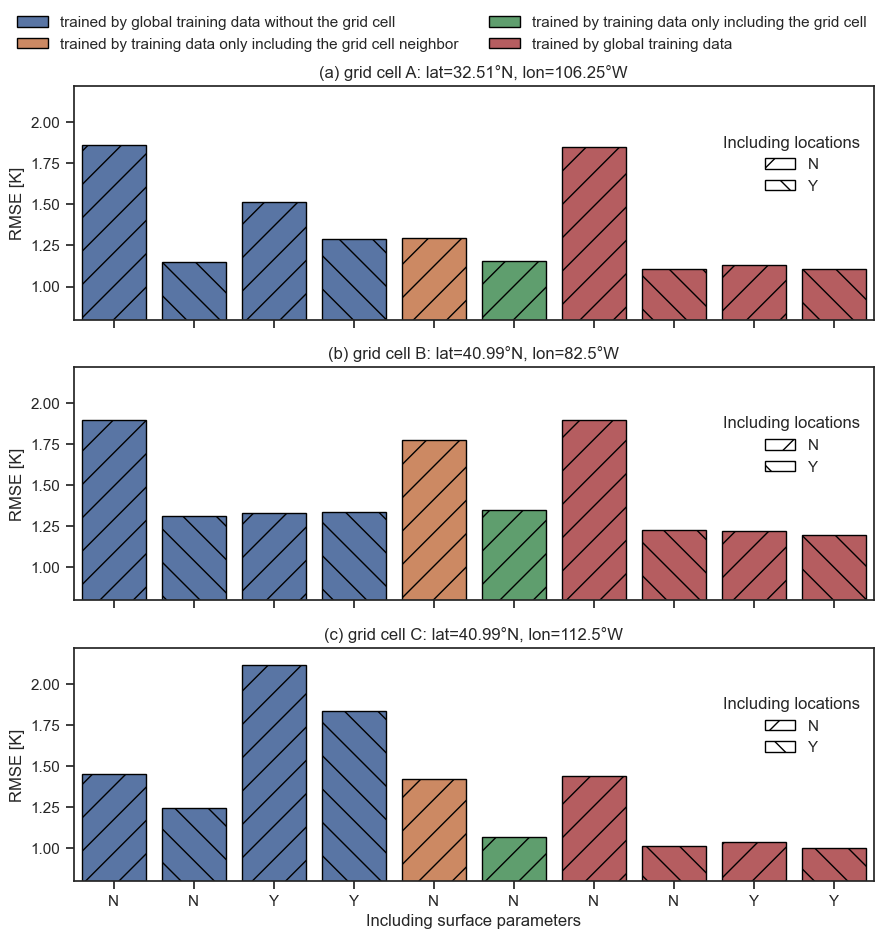

In [7]:
sns.set(rc={'figure.figsize':(12,5)}, style='ticks')
df = df.rename(columns={"city":"grid"})
g = sns.catplot(x="model_name",y="rmse",row="grid",hue='model', data=df,kind="bar",
                dodge=False, legend=False, height=3, aspect=3, sharex=True,
                edgecolor="black", linewidth=1)
#g.set_xticklabels(rotation=45, ha='right', labels=df["model_name"].unique())

fig = g.fig
handles, labels = g.axes[0, 0].get_legend_handles_labels()
handles = handles[:5]
labels = labels[:5]
labels = ['trained by global training data without the grid cell', 
          'trained by training data only including the grid cell neighbor', 
          'trained by training data only including the grid cell', 
          'trained by global training data']
legend1 = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, title="", frameon=False)

i = 0
hatch_patterns = ['/', '\\']
for ax in g.axes.flat:
    sns.despine(left=False, right=False, top=False, bottom=False, ax=ax)
    for i, bar in enumerate(ax.patches):
        #print(bar.get_x())
        hatch = hatch_patterns[i % len(hatch_patterns)]
        if bar.get_x()==4.6:
            hatch = hatch_patterns[0]
            
        bar.set_hatch(hatch)

g.set_ylabels("RMSE [K]")
g.set(ylim=0.80)
g.set_xlabels("")
titles = ['a', 'b', 'c']  
cell = ['C', 'B', 'A']
color_handles = [patches.Rectangle((0, 0), 1, 1, hatch=hatch, lw=1, facecolor="none", edgecolor="black") for hatch in hatch_patterns]
for ax, title in zip(g.axes.flat, titles):
    num = ax.get_title().split("= ")[-1]
    ax.set_title(f"({title}) grid cell {cell.pop()}: lat={round(known_gridcell[num]['lat'], 2)}°N, lon={360-known_gridcell[num]['lon']}°W")
    color_labels = ['N', 'Y']
    legend2 = ax.legend(color_handles, color_labels, title='Including locations', loc='upper right', bbox_to_anchor=(1, 0.85), frameon=False)
ax.set_xticklabels(df.query("grid==1")["surf"])
ax.set_xlabel("Including surface parameters")
fig.tight_layout()
fig.savefig('./paper_figs/city_extrapolation.pdf', dpi=188, bbox_inches='tight')
fig.show()